## Bankruptcy Prevention

It is a Binary classification project, where the goal is to build the model to predict Whether the Business goes bankrupt or not by the given various factors
1. 	Industrial_risk
2.	Management_risk
3.	Financial flexibility
4.	Credibility
5.	Competitiveness
6.	Operating_risk
7.	Class : Feature to be predicted.



In [35]:
#Importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

In [55]:
import pandas as pd

# Replace 'your_file.xlsx' with the actual file path
file_path = r'C:\Users\Rahul\Desktop\Projects\Bankruptcy_Prevention\bankruptcy-prevention.xlsx'

# Read the Excel file into a DataFrame
data = pd.read_excel(file_path)

# Print the resulting DataFrame
print(data)

     industrial_risk  management_risk  financial_flexibility  credibility  \
0                0.5              1.0                    0.0          0.0   
1                0.0              1.0                    0.0          0.0   
2                1.0              0.0                    0.0          0.0   
3                0.5              0.0                    0.0          0.5   
4                1.0              1.0                    0.0          0.0   
..               ...              ...                    ...          ...   
245              0.0              1.0                    1.0          1.0   
246              1.0              1.0                    0.5          1.0   
247              0.0              1.0                    1.0          0.5   
248              1.0              0.0                    0.5          1.0   
249              1.0              0.0                    0.5          0.5   

     competitiveness  operating_risk           class  
0                0.0

In [37]:
#Changing the column names
#data.columns=['industrial_risk','management_risk','financial_flexibility','credibility','competitiveness','operating_risk','class']

In [56]:
data.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

## EDA And Visuvalization

In [57]:
# Basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [58]:
# Checking the number of rows and columns

data.shape

(250, 7)

In [59]:
#Checking for the duplicated data
data.duplicated().any()

True

In [60]:
data[data.duplicated()]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
11,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
13,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
15,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
16,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
18,0.5,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [61]:
# Among 147 duplicated rows, rows belonging to the bankruptcy class.
data[data["class"]=='bankruptcy'].duplicated().sum()

82

In [62]:
# Among 147 duplicated rows, rows belonging to the non-bankruptcy class.
data[data["class"]=='non-bankruptcy'].duplicated().sum()

65

In [63]:
#Checking for null values
data.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

<AxesSubplot:>

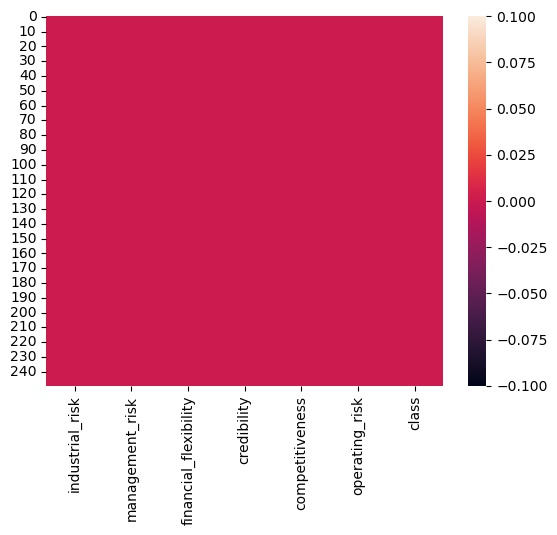

In [64]:
sn.heatmap(data.isnull())

#### No null values.

<AxesSubplot:xlabel='class', ylabel='count'>

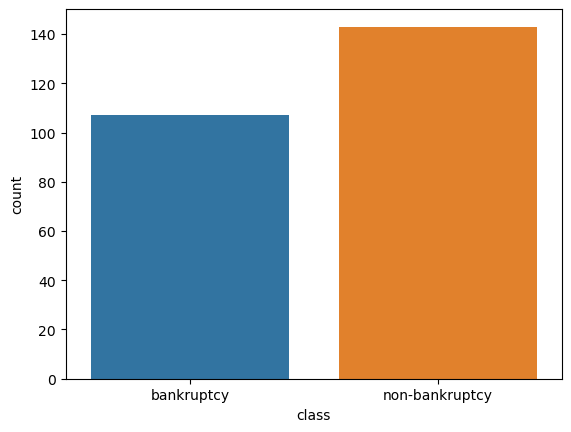

In [66]:
sn.countplot(data['class'])

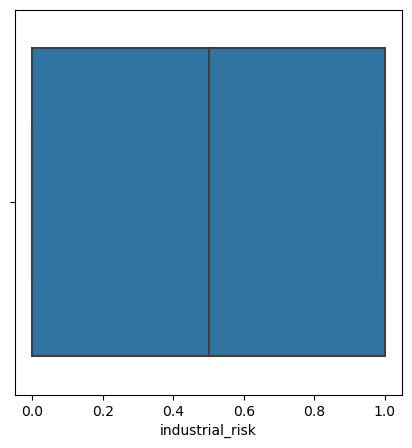

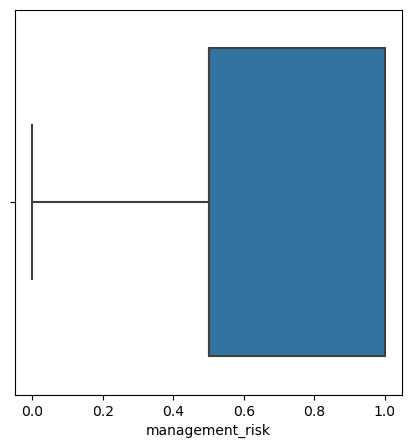

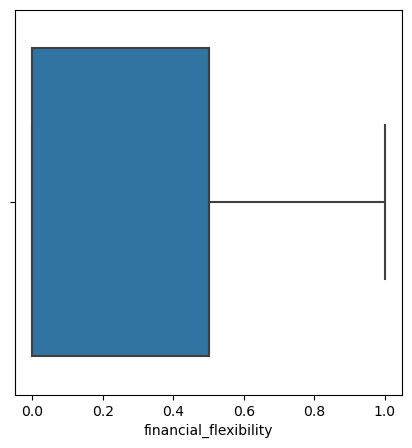

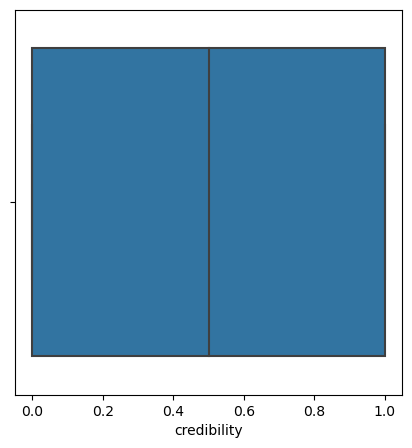

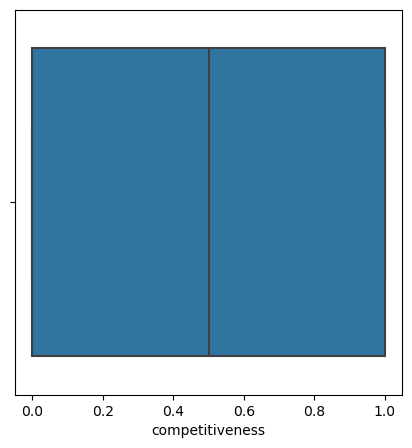

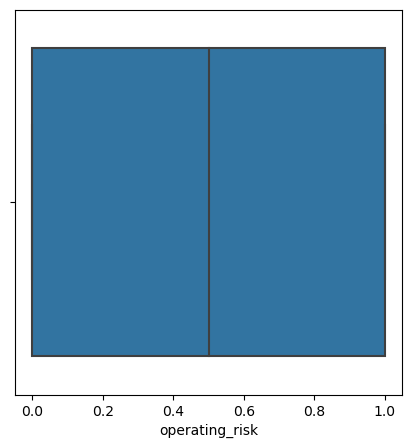

In [67]:
# Checking for outliers
for i in data.iloc[:,:-1]:
    plt.figure(figsize=(5,5))
    sn.boxplot(data[i],x="class",data=data)
    plt.show()

There are not much outliers in the data when compared to respective mean and median values. 

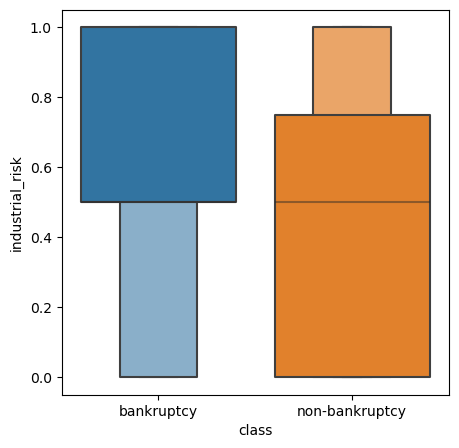

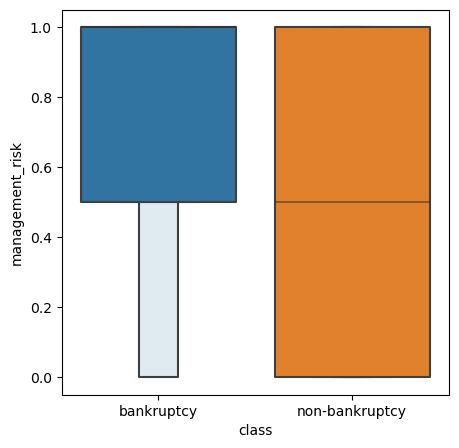

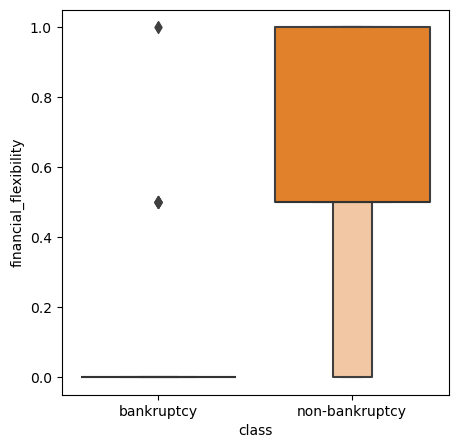

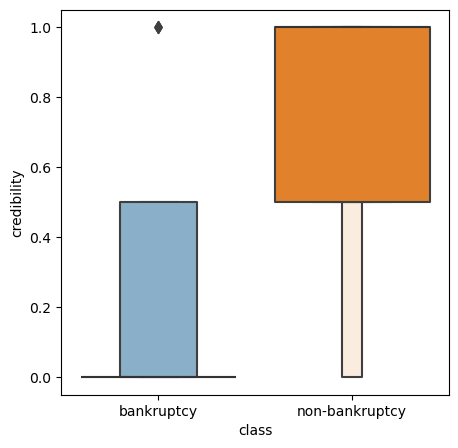

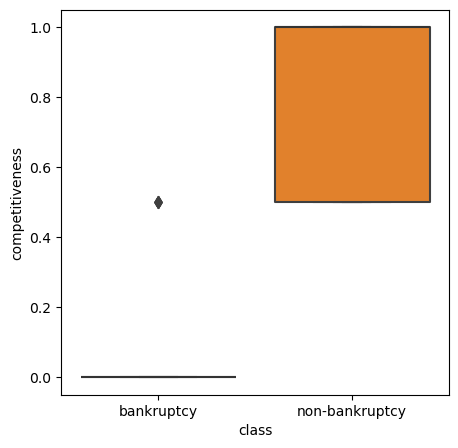

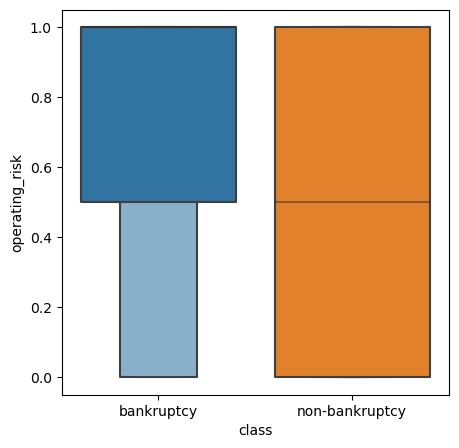

In [68]:
# Checking for outliers
for i in data.iloc[:,:-1]:
    plt.figure(figsize=(5,5))
    sn.boxenplot(y=data[i],x="class",data=data)
    plt.show()

Observations:
1. Maximum bankruptcy companies have industrial risk ranging from 0.5 to 1
  
   and that of non bankruptcy companies have from 0 to o.7

2. Maximum bankruptcy companies have management risk ranging from 0.5 to 1
   
   and that of non bankruptcy companies have from 0 to 1

3. Maximum bankruptcy companies have very low financial flexibility.
   
   and that of non bankruptcy companies have from 0.5 to 1

4. credibility is also very low for bankruptcy companies than compared to the non-bankruptcy.

5. competitiveness is very high in non bankruptcy companies.


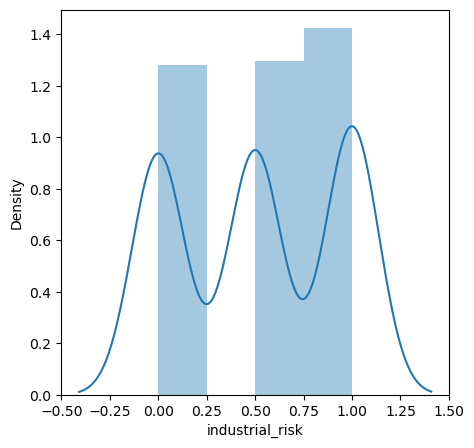

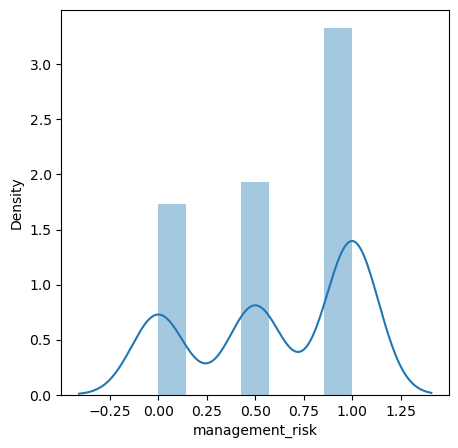

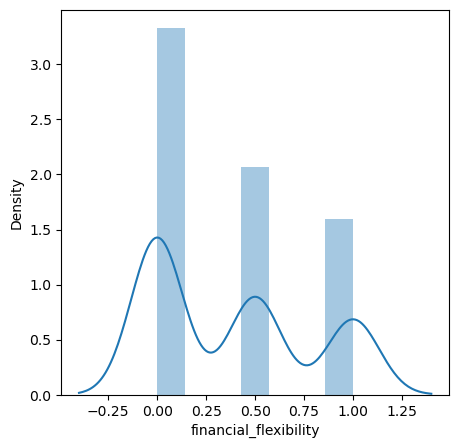

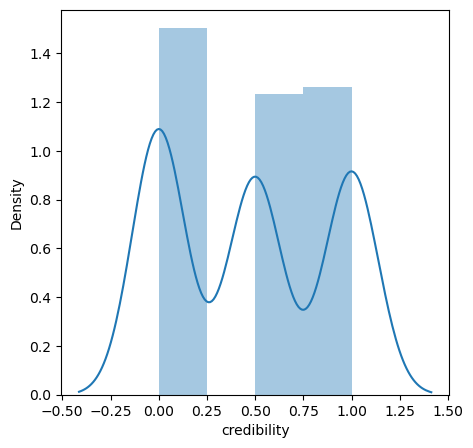

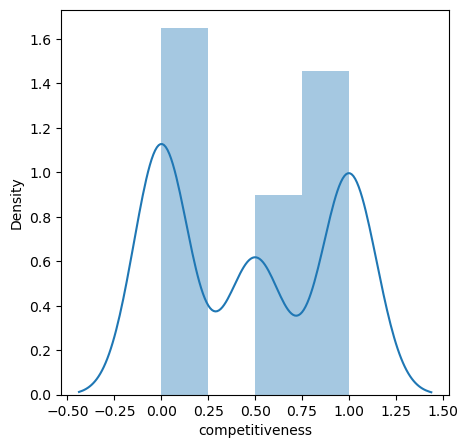

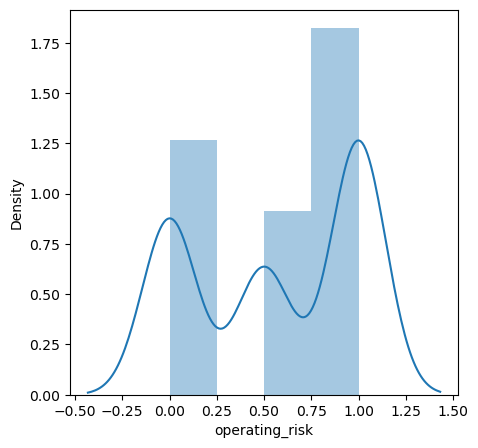

In [69]:
#Checking the distribution of each features
for i in data.iloc[:,:-1]:
    plt.figure(figsize=(5,5))
    sn.distplot(data[i])
    plt.show()

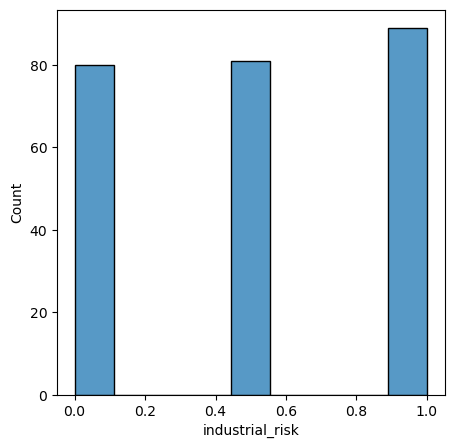

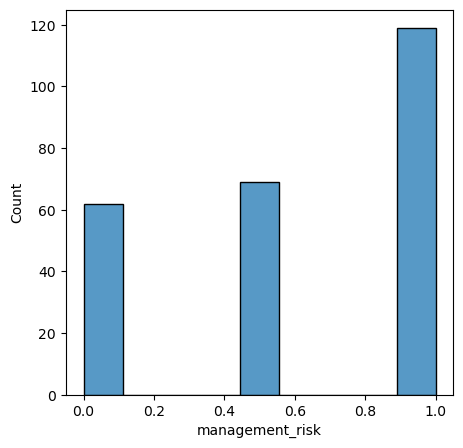

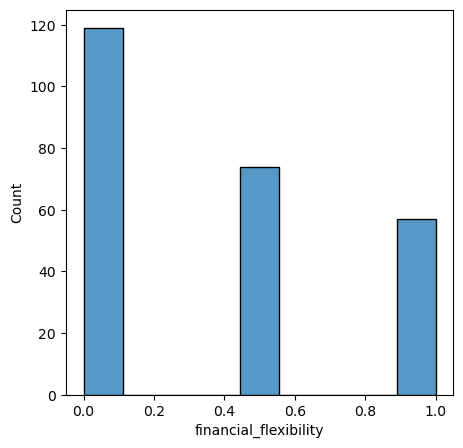

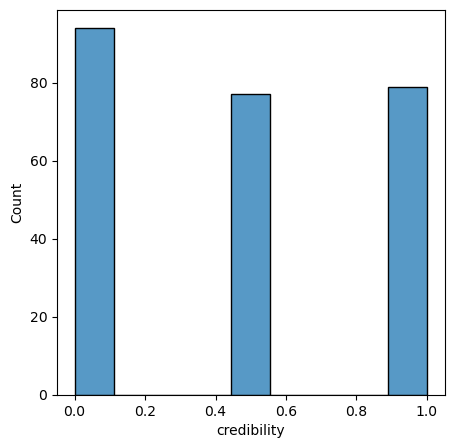

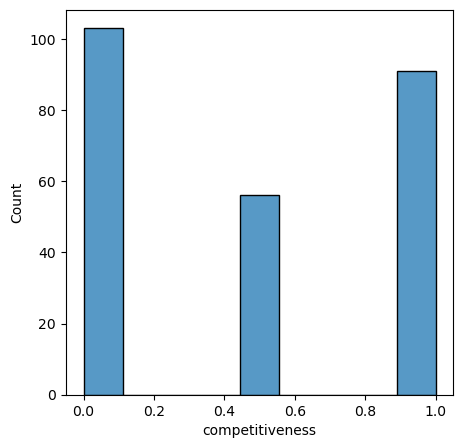

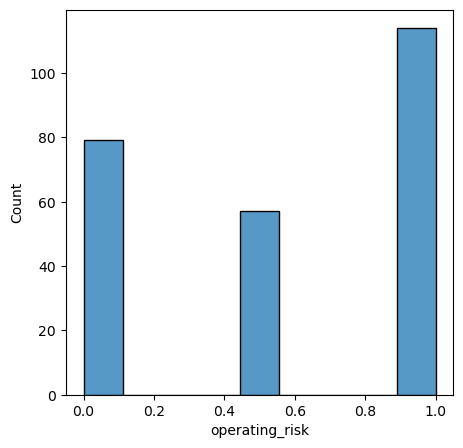

In [70]:
#Checking the distribution of each features
for i in data.iloc[:,:-1]:
    plt.figure(figsize=(5,5))
    sn.histplot(data[i])
    plt.show()

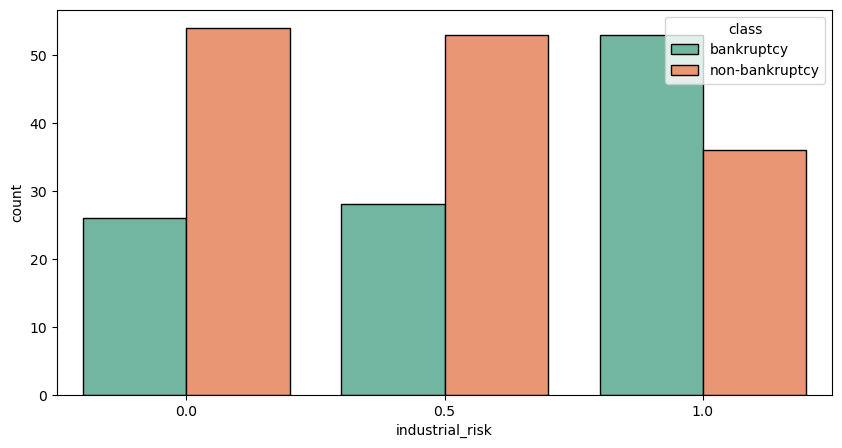

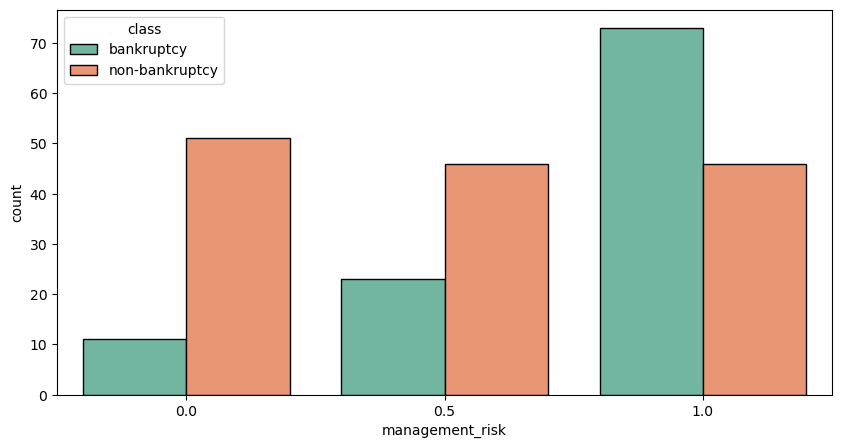

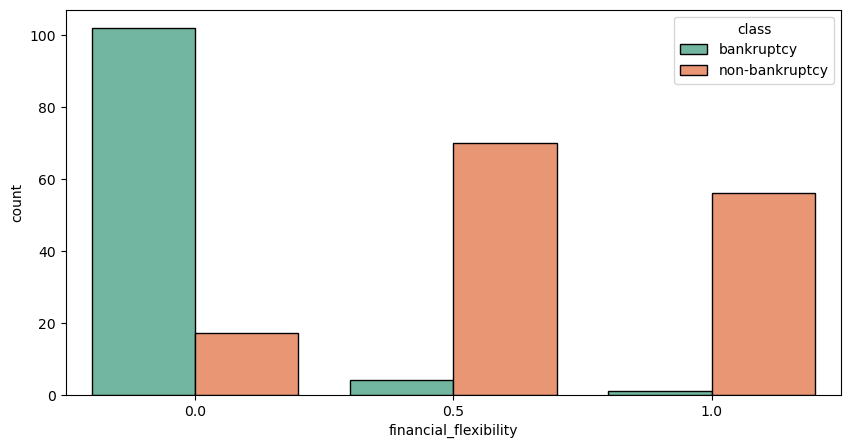

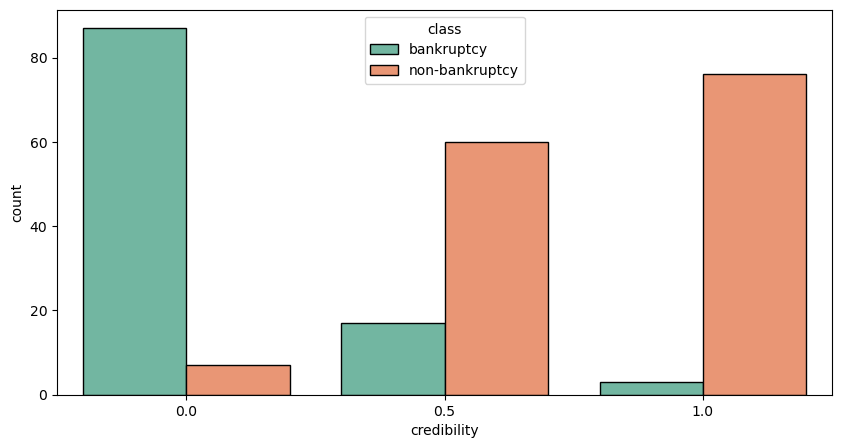

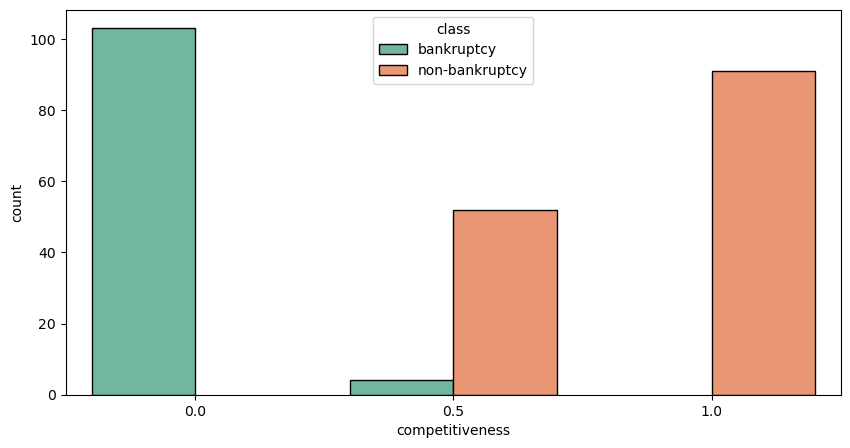

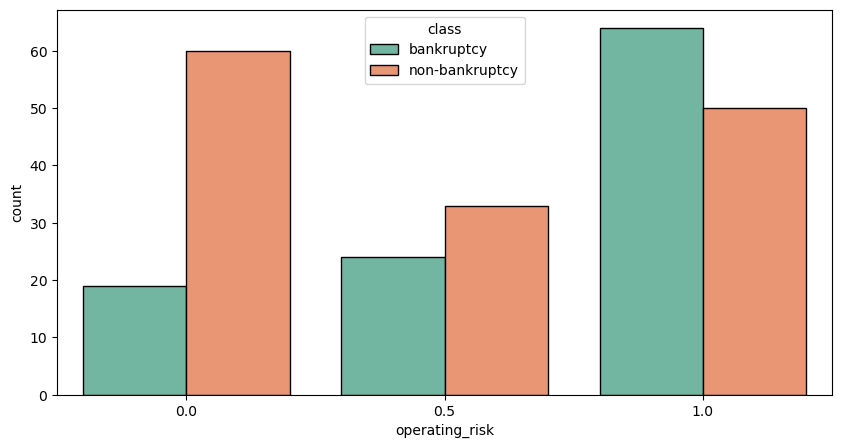

In [71]:
#Plotting Dependent variable(class) with all features
for i in data.iloc[:,:-1]:
    plt.figure(figsize=(10,5))
    sn.countplot(data[i],hue=data['class'],palette="Set2",edgecolor="Black")
    plt.show()

Observations:
1. Maximum bankruptcy business have industrial risk 1.0
   
2. Maximum non-bankruptcy business have industrial risk 0.0

3. Maximum bankruptcy business have management risk 1.0
   
4. Maximum non-bankruptcy business have management risk 0.0  

5. Maximum bankruptcy business have financial flexibility 0.0
   
6. Maximum non-bankruptcy business have financial flexibility 0.5  

7. Maximum bankruptcy business have credibility 0.0
8. Maximum non-bankruptcy business have credibility 1.0 
9. Maximum bankruptcy business have competitiveness 0.0
   
10. Maximum non-bankruptcy business have competitiveness 1.0 
11. Maximum bankruptcy business have operating risk 1.0
   
12. Maximum non-bankruptcy business have operating risk 0.0

<AxesSubplot:>

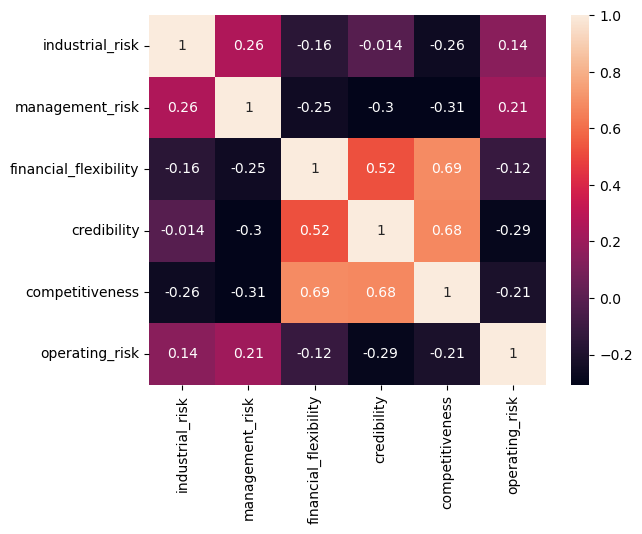

In [72]:
# Checking corelation of variables
sn.heatmap(data.corr(),annot=True)

### Encoding Categorical Data

In [73]:
data['class']=LabelEncoder().fit_transform(data['class'])
data.head(3)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0


<AxesSubplot:xlabel='class', ylabel='count'>

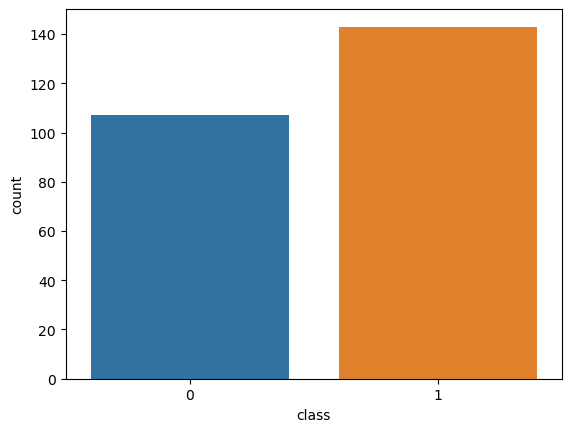

In [74]:
sn.countplot(data['class'])

## Model Building

In [75]:
# Splitting the Dependent and Independent Variable
X= data.iloc[:,:-1]
y= data.iloc[:,-1]


In [76]:
# Splitting X and y into test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

### Logistic Regression

In [77]:
#Model building
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
Model_1=LogisticRegression().fit(X_train,y_train)
ypred_1=Model_1.predict(X_test)

In [78]:
# Evaluation of the model
print(classification_report(y_test,ypred_1))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        50

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



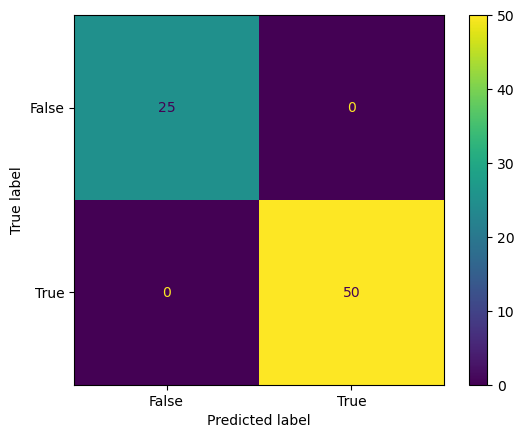

In [79]:
# Plotting the confusion matrix
cm_1= confusion_matrix(ypred_1,y_test)
cmd_1 = metrics.ConfusionMatrixDisplay(confusion_matrix =cm_1, display_labels = [False, True])
cmd_1.plot()
plt.show()

1. It seems there is no False positve or negetive Predictions.
2. Accuracy is also 100%

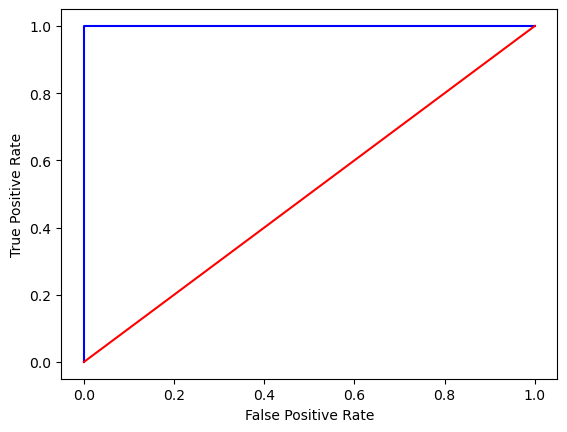

In [80]:
# Plottin the ROC curve
from sklearn.metrics import roc_curve,roc_auc_score
fpr_1,tpr_1,thresholds_1=roc_curve(y_test,Model_1.predict_proba(X_test)[:,1])
auc_1=roc_auc_score(y_test,ypred_1)
plt.plot(fpr_1,tpr_1,color='blue')
plt.plot([0,1],[0,1],color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [27]:
print("Area under the ROC curve, AUC is",auc_1)

Area under the ROC curve, AUC is 1.0


### KNN

In [81]:
# Using Gridsearchcv to tuning parameter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
n_neighbours=[i for i in range(2,10)]
param_grid=dict(n_neighbors=n_neighbours)
Model_t=KNeighborsClassifier()
grid=GridSearchCV(Model_t,param_grid=param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [82]:
f'Best parameter score for best parameter: {grid.best_score_}'

'Best parameter score for best parameter: 0.9885714285714287'

In [83]:
f'Best parameter for KNN model:{grid.best_params_}'

"Best parameter for KNN model:{'n_neighbors': 2}"

In [84]:
#Building the model with neighbour as 2
Model_2=KNeighborsClassifier(n_neighbors=2)
Model_2.fit(X_train,y_train)
ypred_2=Model_2.predict(X_test)

In [85]:
# Evaluation of the model
print(classification_report(y_test,ypred_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        50

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



<AxesSubplot:>

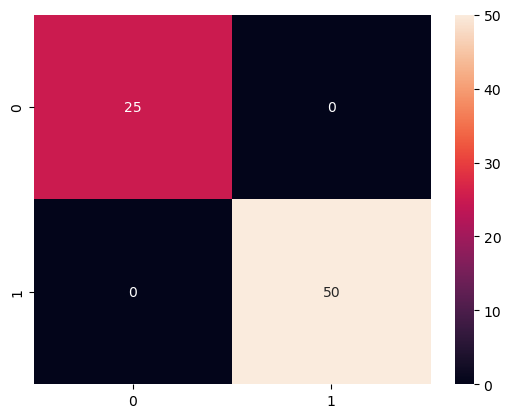

In [86]:
# Heat map of the confusion matrix
cm_2= confusion_matrix(ypred_2,y_test)
sn.heatmap(confusion_matrix(ypred_2,y_test),annot=True)

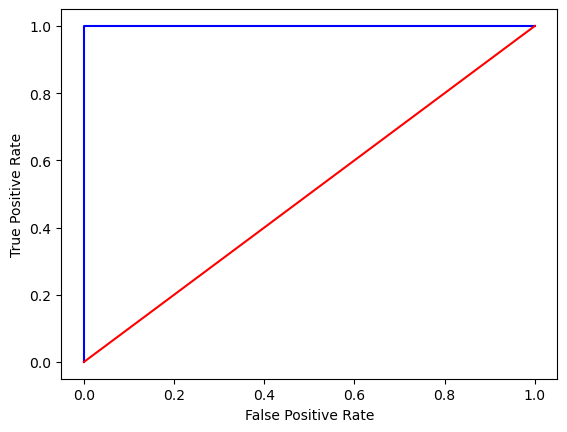

In [87]:
# Plottin the ROC curve
from sklearn.metrics import roc_curve,roc_auc_score
fpr_2,tpr_2,thresholds_2=roc_curve(y_test,Model_2.predict_proba(X_test)[:,1])
auc_2=roc_auc_score(y_test,ypred_2)
plt.plot(fpr_2,tpr_2,color='blue')
plt.plot([0,1],[0,1],color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [88]:
print("Area under the ROC curve, AUC is",auc_2)

Area under the ROC curve, AUC is 1.0


### Decision Tree

In [89]:
# Building Decision Tree model using entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
Model_3=DecisionTreeClassifier(criterion='entropy',max_depth=3).fit(X_train,y_train)
ypred_3=Model_3.predict(X_test)

[Text(0.4, 0.875, 'X[4] <= 0.25\nentropy = 0.997\nsamples = 175\nvalue = [82, 93]\nclass = Non-Bankruptcy'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 78\nvalue = [78, 0]\nclass = Bankruptcy'),
 Text(0.6, 0.625, 'X[3] <= 0.25\nentropy = 0.248\nsamples = 97\nvalue = [4, 93]\nclass = Non-Bankruptcy'),
 Text(0.4, 0.375, 'X[4] <= 0.75\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]\nclass = Bankruptcy'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Bankruptcy'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Non-Bankruptcy'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 90\nvalue = [0, 90]\nclass = Non-Bankruptcy')]

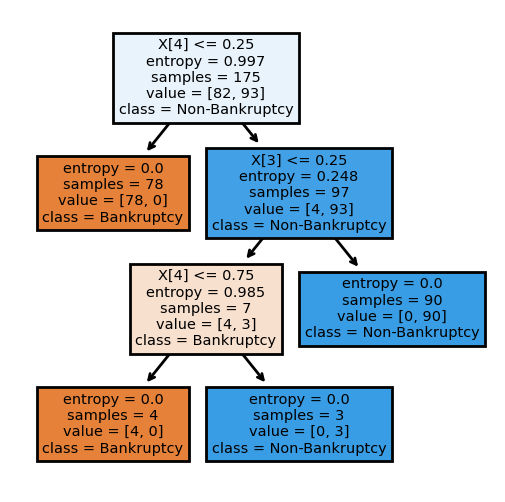

In [90]:
# Plotting the Decision tree
names=["Bankruptcy","Non-Bankruptcy"]
fig, axes=plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=200)
tree.plot_tree(Model_3,class_names=names,filled=True)

In [91]:
# Evaluation of the model
print(classification_report(y_test,ypred_3))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.98      0.99        50

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



<AxesSubplot:>

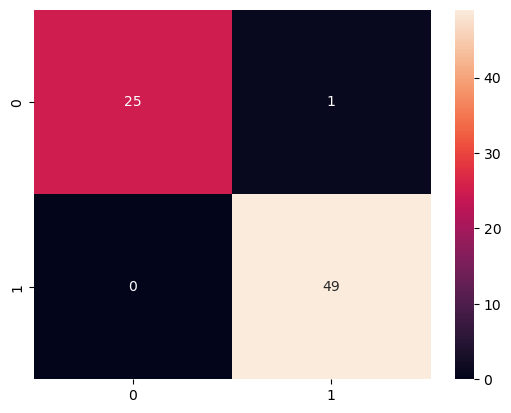

In [92]:
# Heat map of the confusion matrix
cm_3= confusion_matrix(ypred_3,y_test)
sn.heatmap(confusion_matrix(ypred_3,y_test),annot=True)

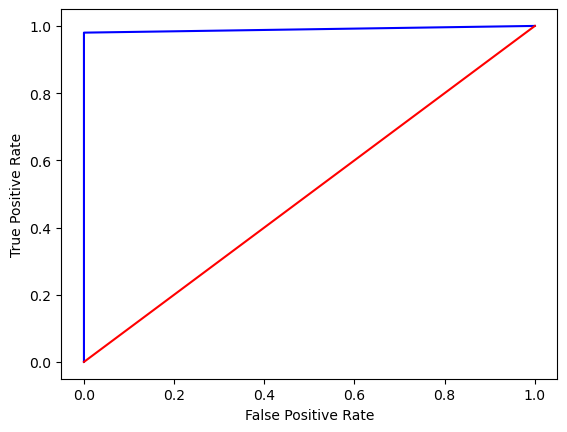

In [93]:
# Plottin the ROC curve
from sklearn.metrics import roc_curve,roc_auc_score
fpr_3,tpr_3,thresholds_3=roc_curve(y_test,Model_3.predict_proba(X_test)[:,1])
auc_3=roc_auc_score(y_test,ypred_3)
plt.plot(fpr_3,tpr_3,color='blue')
plt.plot([0,1],[0,1],color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [94]:
print("Area under the ROC curve, AUC is",auc_3)

Area under the ROC curve, AUC is 0.99


### SVM

In [95]:

from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
Model_u = SVC()
param_grid = [{'kernel':['linear','rbf'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001] }]
gsv = RandomizedSearchCV(Model_u,param_grid,cv=10,verbose=300)
gsv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START C=0.1, gamma=0.5, kernel=rbf..............................
[CV 1/10; 1/10] END C=0.1, gamma=0.5, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/10; 1/10] START C=0.1, gamma=0.5, kernel=rbf..............................
[CV 2/10; 1/10] END C=0.1, gamma=0.5, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/10; 1/10] START C=0.1, gamma=0.5, kernel=rbf..............................
[CV 3/10; 1/10] END C=0.1, gamma=0.5, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/10; 1/10] START C=0.1, gamma=0.5, kernel=rbf..............................
[CV 4/10; 1/10] END C=0.1, gamma=0.5, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/10; 1/10] START C=0.1, gamma=0.5, kernel=rbf..............................
[CV 5/10; 1/10] END C=0.1, gamma=0.5, kernel=rbf;, score=1.000 total time=   0.0s
[CV 6/10; 1/10] START C=0.1, gamma=0.5, kernel=rbf..............................
[CV 6/10; 1/10] END C=0.1, gamma=0.5, ker

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions=[{'C': [10, 0.1, 0.001, 0.0001],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['linear', 'rbf']}],
                   verbose=300)

In [96]:
f'Respective best parameter and best parameter scores are : {gsv.best_params_ , gsv.best_score_ }'

"Respective best parameter and best parameter scores are : ({'kernel': 'rbf', 'gamma': 0.5, 'C': 0.1}, 0.9941176470588236)"

In [97]:
# Building the model with the parameters
Model_4 = SVC(kernel='linear',C=10)
Model_4.fit(X_train , y_train)
ypred_4=Model_4.predict(X_test)

In [98]:
# Evaluation of the model
print(classification_report(y_test,ypred_4))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.98      0.99        50

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



<AxesSubplot:>

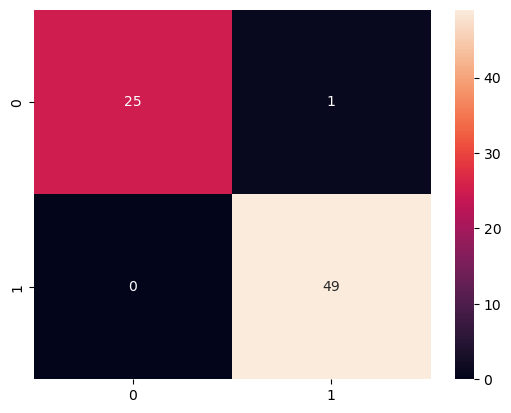

In [99]:
# Heat map of the confusion matrix
cm_4= confusion_matrix(ypred_4,y_test)
sn.heatmap(confusion_matrix(ypred_4,y_test),annot=True)

In [100]:

auc_4=roc_auc_score(y_test,ypred_4)
auc_4

0.99

### Naive Byes

In [101]:
from sklearn.naive_bayes import GaussianNB
Model_5 = GaussianNB()
Model_5.fit(X_train,y_train)
ypred_5 = Model_5.predict(X_test)

In [102]:
# Evaluation of the model
print(classification_report(y_test,ypred_5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        50

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



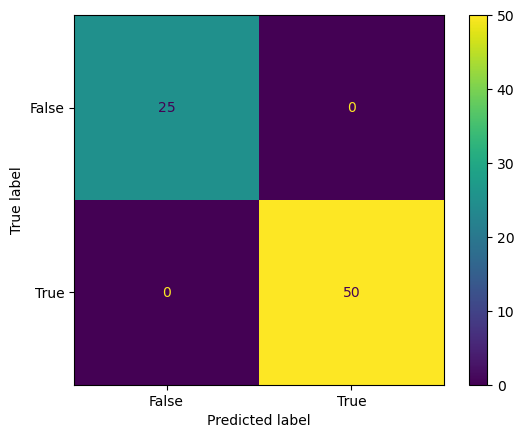

In [103]:
# Plotting the confusion matrix
cm_5 =confusion_matrix(ypred_5,y_test)
cmd_5 = metrics.ConfusionMatrixDisplay(confusion_matrix =cm_5, display_labels = [False, True])
cmd_5.plot()
plt.show()

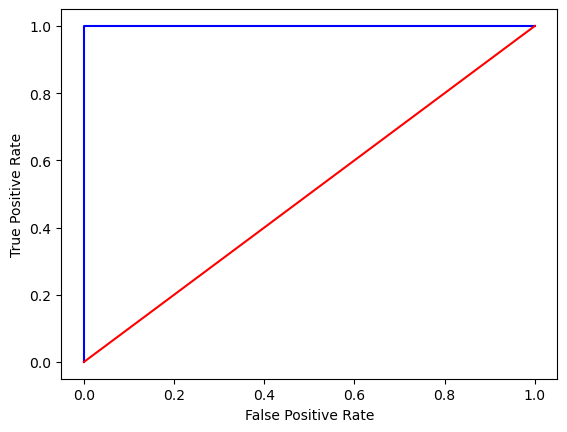

In [104]:
# Plottin the ROC curve
from sklearn.metrics import roc_curve,roc_auc_score
fpr_5,tpr_5,thresholds_5=roc_curve(y_test,Model_5.predict_proba(X_test)[:,1])
auc_5=roc_auc_score(y_test,ypred_5)
plt.plot(fpr_5,tpr_5,color='blue')
plt.plot([0,1],[0,1],color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [105]:
print("Area under the ROC curve, AUC is",auc_5)

Area under the ROC curve, AUC is 1.0


### Random Forest

In [106]:
#Building model(Hyperparameter tuning)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
num_trees = 20
max_features = 3
kfold = KFold(n_splits=10) 
model_v = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model_v, X, y, cv=kfold)
print(results.mean())


0.9960000000000001


In [107]:
#Building model
Model_6= RandomForestClassifier()
Model_6.fit(X_train,y_train)
ypred_6= Model_6.predict(X_test)

In [108]:
# Evaluation of the model
print(classification_report(y_test,ypred_5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        50

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



<AxesSubplot:>

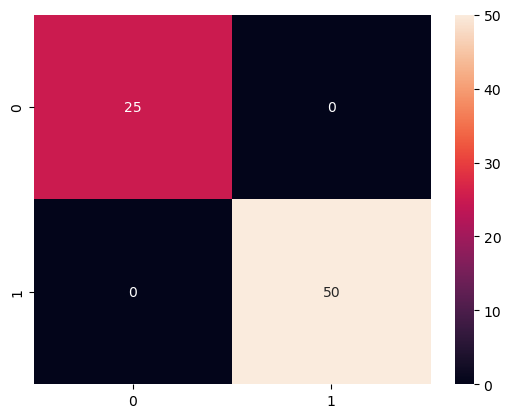

In [109]:
# Heat map of the confusion matrix
cm_6= confusion_matrix(ypred_6,y_test)
sn.heatmap(confusion_matrix(ypred_6,y_test),annot=True)

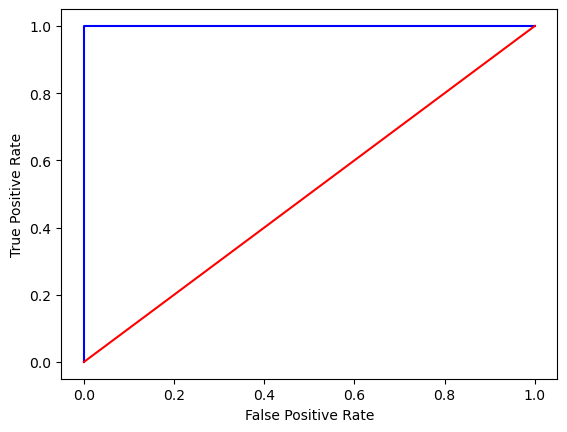

In [110]:
# Plottin the ROC curve
from sklearn.metrics import roc_curve,roc_auc_score
fpr_6,tpr_6,thresholds_6=roc_curve(y_test,Model_6.predict_proba(X_test)[:,1])
auc_6=roc_auc_score(y_test,ypred_6)
plt.plot(fpr_6,tpr_6,color='blue')
plt.plot([0,1],[0,1],color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [111]:
Evaluation=pd.DataFrame({'Models':['Logistic Regression','KNN','Decision Tree','SVM','Naive Byes','Random forest'],
                          'Accuracy':[auc_1,auc_2,auc_3,auc_4,auc_5,auc_6],
                        'Precision':[metrics.precision_score(ypred_1,y_test),metrics.precision_score(ypred_2,y_test),metrics.precision_score(ypred_3,y_test),
                                     metrics.precision_score(ypred_4,y_test),metrics.precision_score(ypred_5,y_test),metrics.precision_score(ypred_6,y_test)],
                        'Recall': [metrics.recall_score(y_test,ypred_1),metrics.recall_score(y_test,ypred_2),metrics.recall_score(y_test,ypred_3),
                                   metrics.recall_score(y_test,ypred_4),metrics.recall_score(y_test,ypred_5),metrics.recall_score(y_test,ypred_6)]})
Evaluation

,Models,Accuracy,Precision,Recall
0,Logistic Regression,1.00,1.00,1.00
1,KNN,1.00,1.00,1.00
2,Decision Tree,0.99,0.98,0.98
3,SVM,0.99,0.98,0.98
4,Naive Byes,1.00,1.00,1.00
5,Random forest,1.00,1.00,1.00


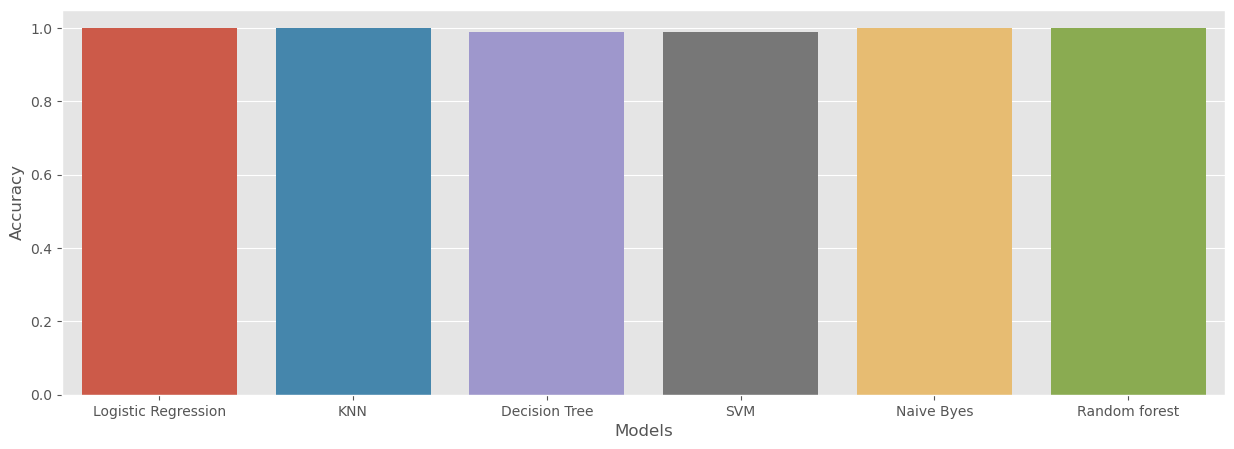

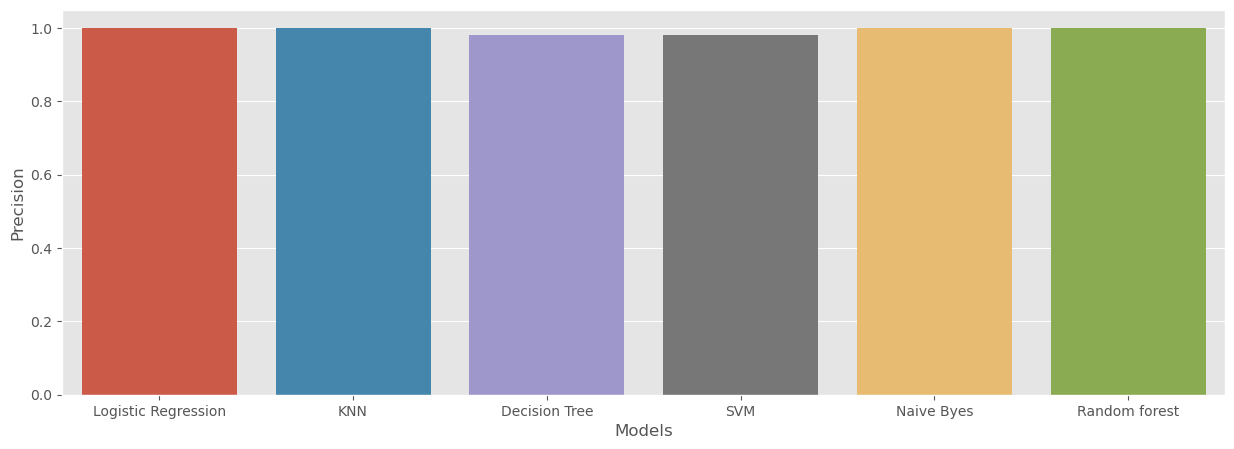

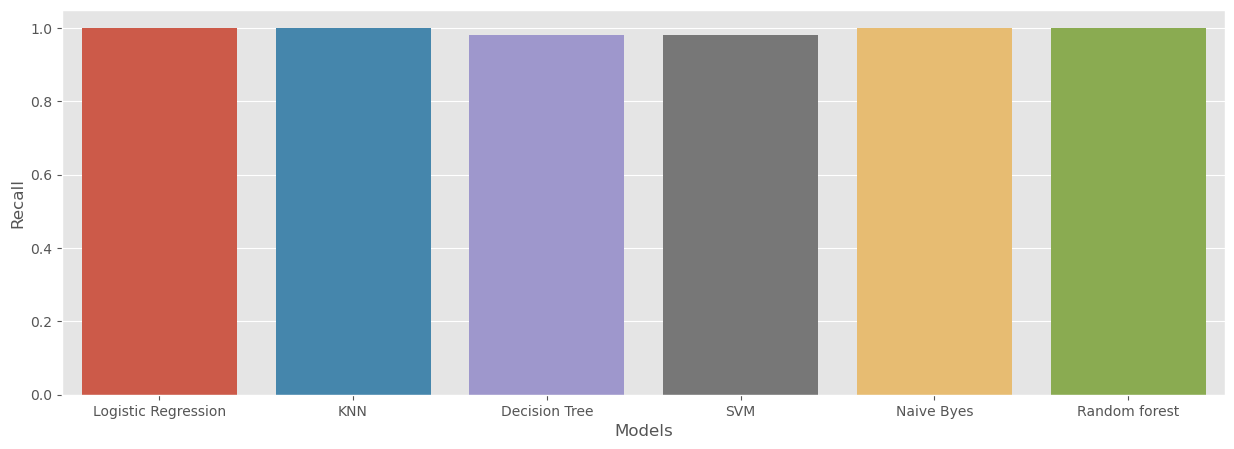

In [112]:
for i in Evaluation.iloc[:,1:]:
    plt.style.use('ggplot') 
    plt.figure(figsize=(15,5))
    sn.barplot(x='Models',y=i,data=Evaluation)
    
plt.show()